# 패키지


In [6]:
# 수치해석, 백터화 연산, 수학 기본 모든 연산
import numpy as np

# 함수, 미적분, 통계적인 전반적으로 모든 연산을 도와주는 패키지
import scipy as sp

# 데이터 프레임 클래스 (R 데이터 프레임 자료형) 머신러닝 데이터 분석이 필수
import pandas as pd

# Matlab 그 장점을 파이썬에 사용할 수 있게 만들주는 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib에서 지원하지 않는 고급 시각화 고급차트
import seaborn as sns

# 회귀 분석, 선형 회귀, 시계열 분석 등등 분석 기능을 제공하는 패키지 
import statsmodels.api as sm

# 머신러닝, 지도학습, 비지도학습, 데이터셋 기능들을 제공하는 패키지
import sklearn as sk

# 데이터 전처리, 누락된 데이터를 찾고 시각화를 할 수 있는 패키지
import missingno as msno

# patsy 데이터 프레임을 다루는 기능 제공하는 패키지
# statsmodels
import patsy

## 전처리 맛보기

In [7]:
%%writefile sample.csv
x1,x2,x3,x4,x5
,a,0.1,철수,2022-11-24
,b,0.2,영희,
3,c,0.3,,2022-11-26
4,d,0.4,은희,2022-11-27
5,,0.5,지우,2022-11-28
6,f,0.6,이슬,2022-11-29

Overwriting sample.csv


In [8]:
import pandas as pd
df = pd.read_csv('sample.csv')

In [9]:
df.isnull()

,x1,x2,x3,x4,x5
0,True,False,False,False,False
1,True,False,False,False,True
2,False,False,False,True,False
3,False,False,False,False,False
4,False,True,False,False,False
5,False,False,False,False,False


In [10]:
df.isnull().sum()

x1    2
x2    1
x3    0
x4    1
x5    1
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4 non-null      float64
 1   x2      5 non-null      object 
 2   x3      6 non-null      float64
 3   x4      5 non-null      object 
 4   x5      5 non-null      object 
dtypes: float64(2), object(3)
memory usage: 368.0+ bytes


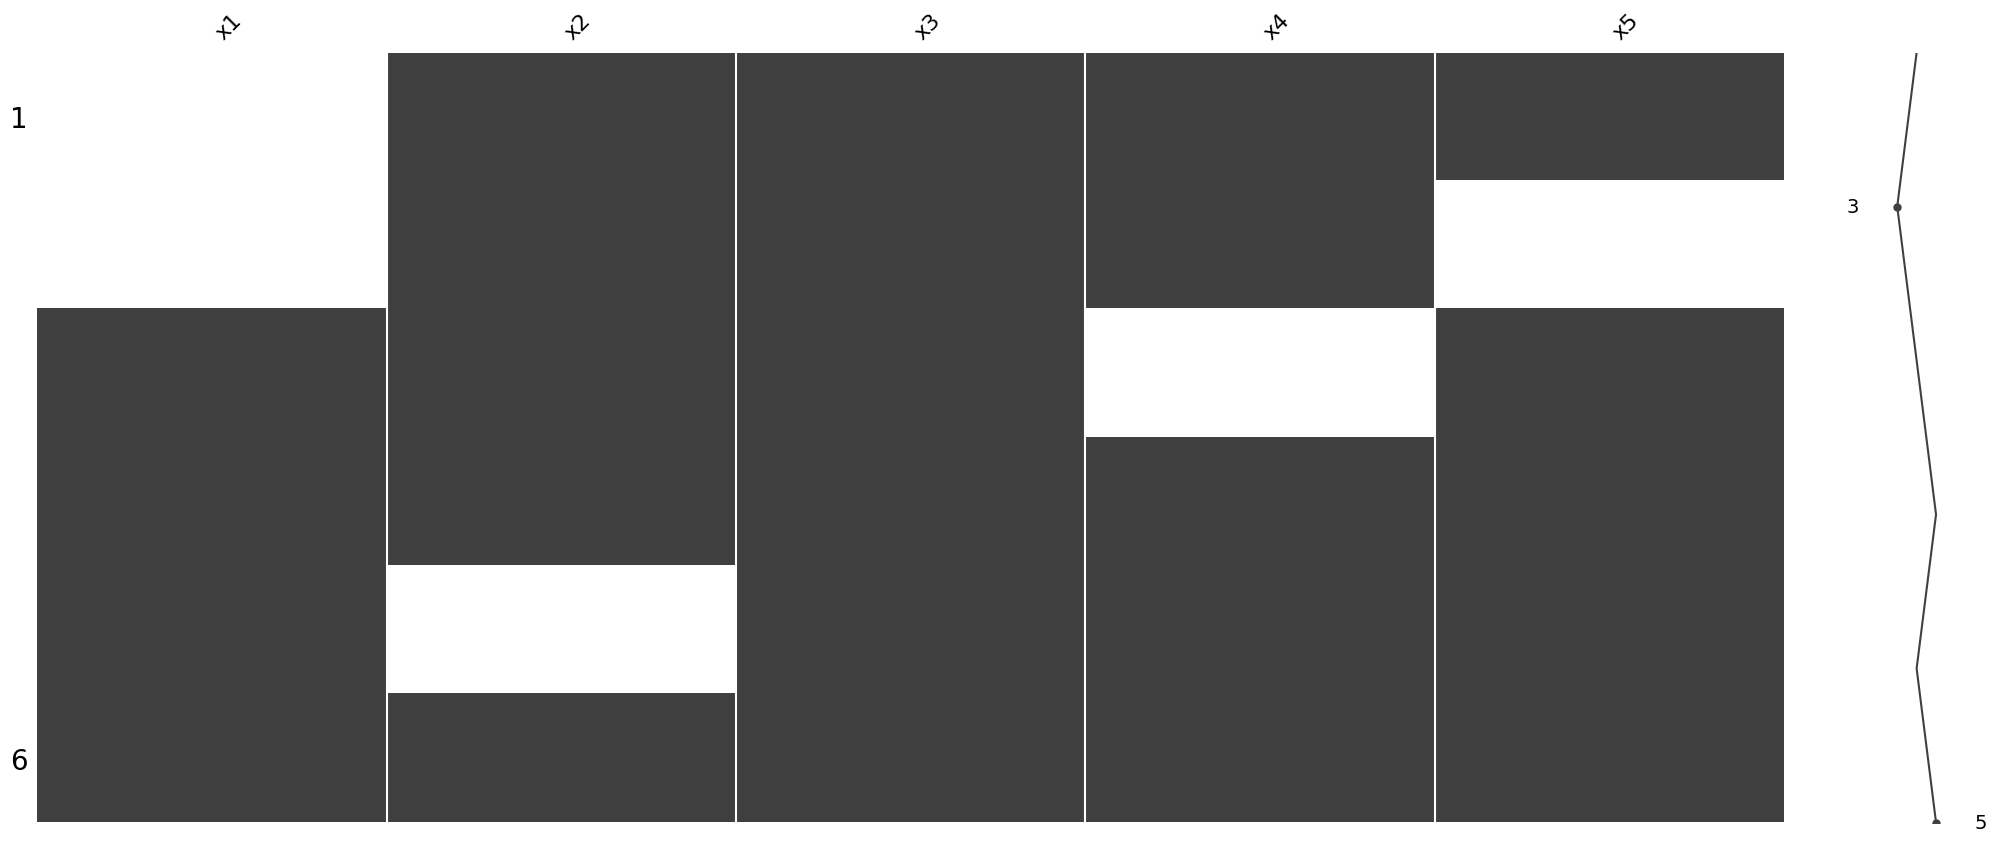

In [12]:
# msno를 이용하여 결측치 matrix 시각화
msno.matrix(df)
plt.show()

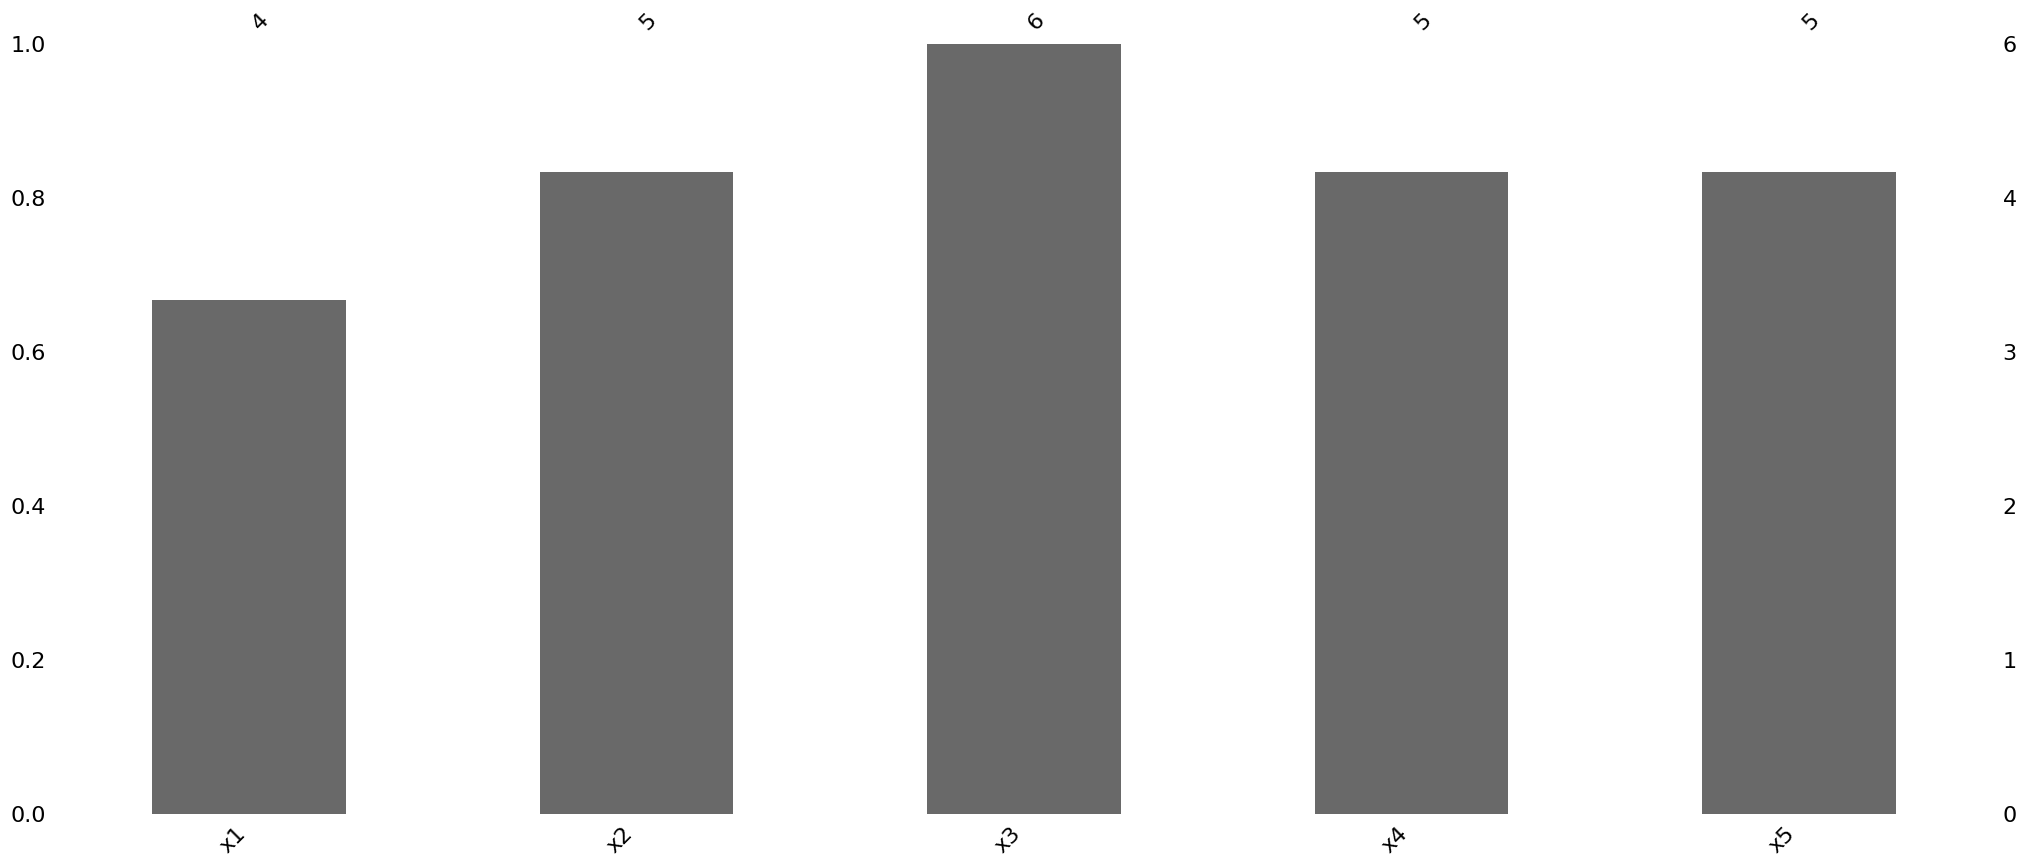

In [13]:
# bar 형태로 시각화
msno.bar(df)
plt.show()

In [14]:
titanic = sns.load_dataset('titanic')

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot: >

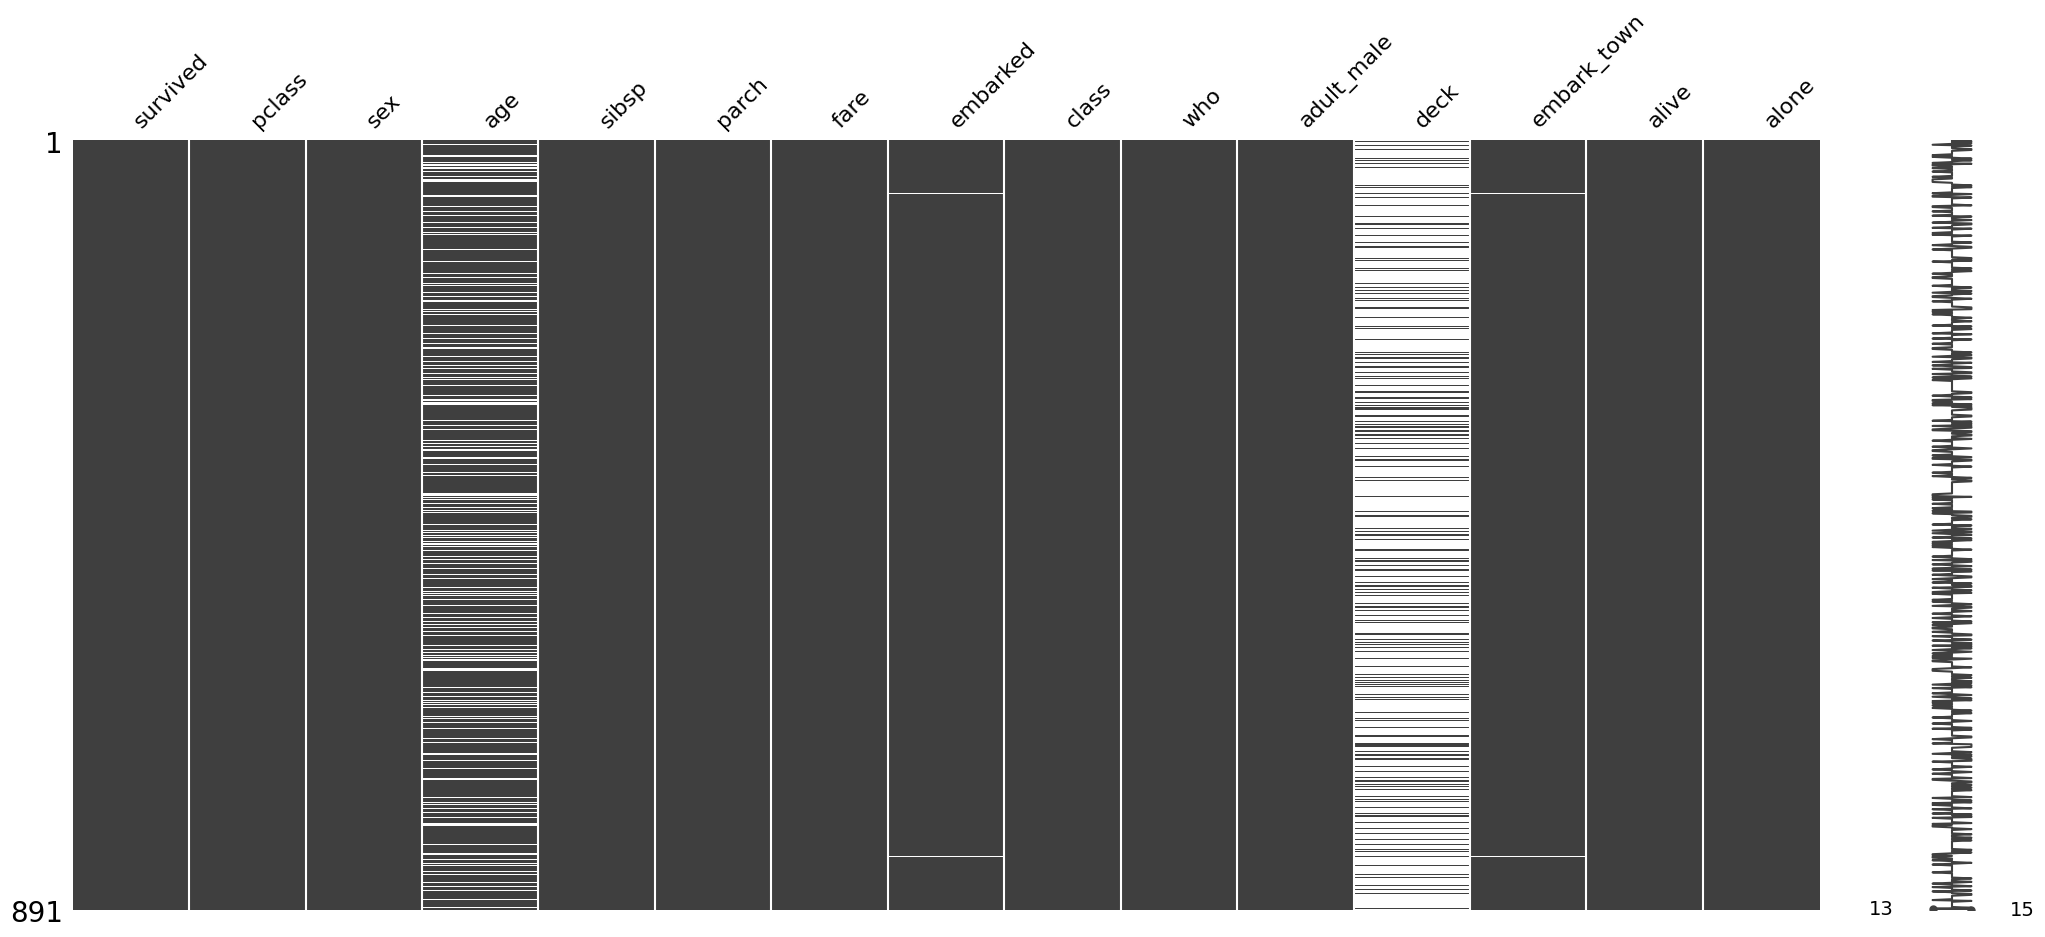

In [17]:
msno.matrix(titanic)

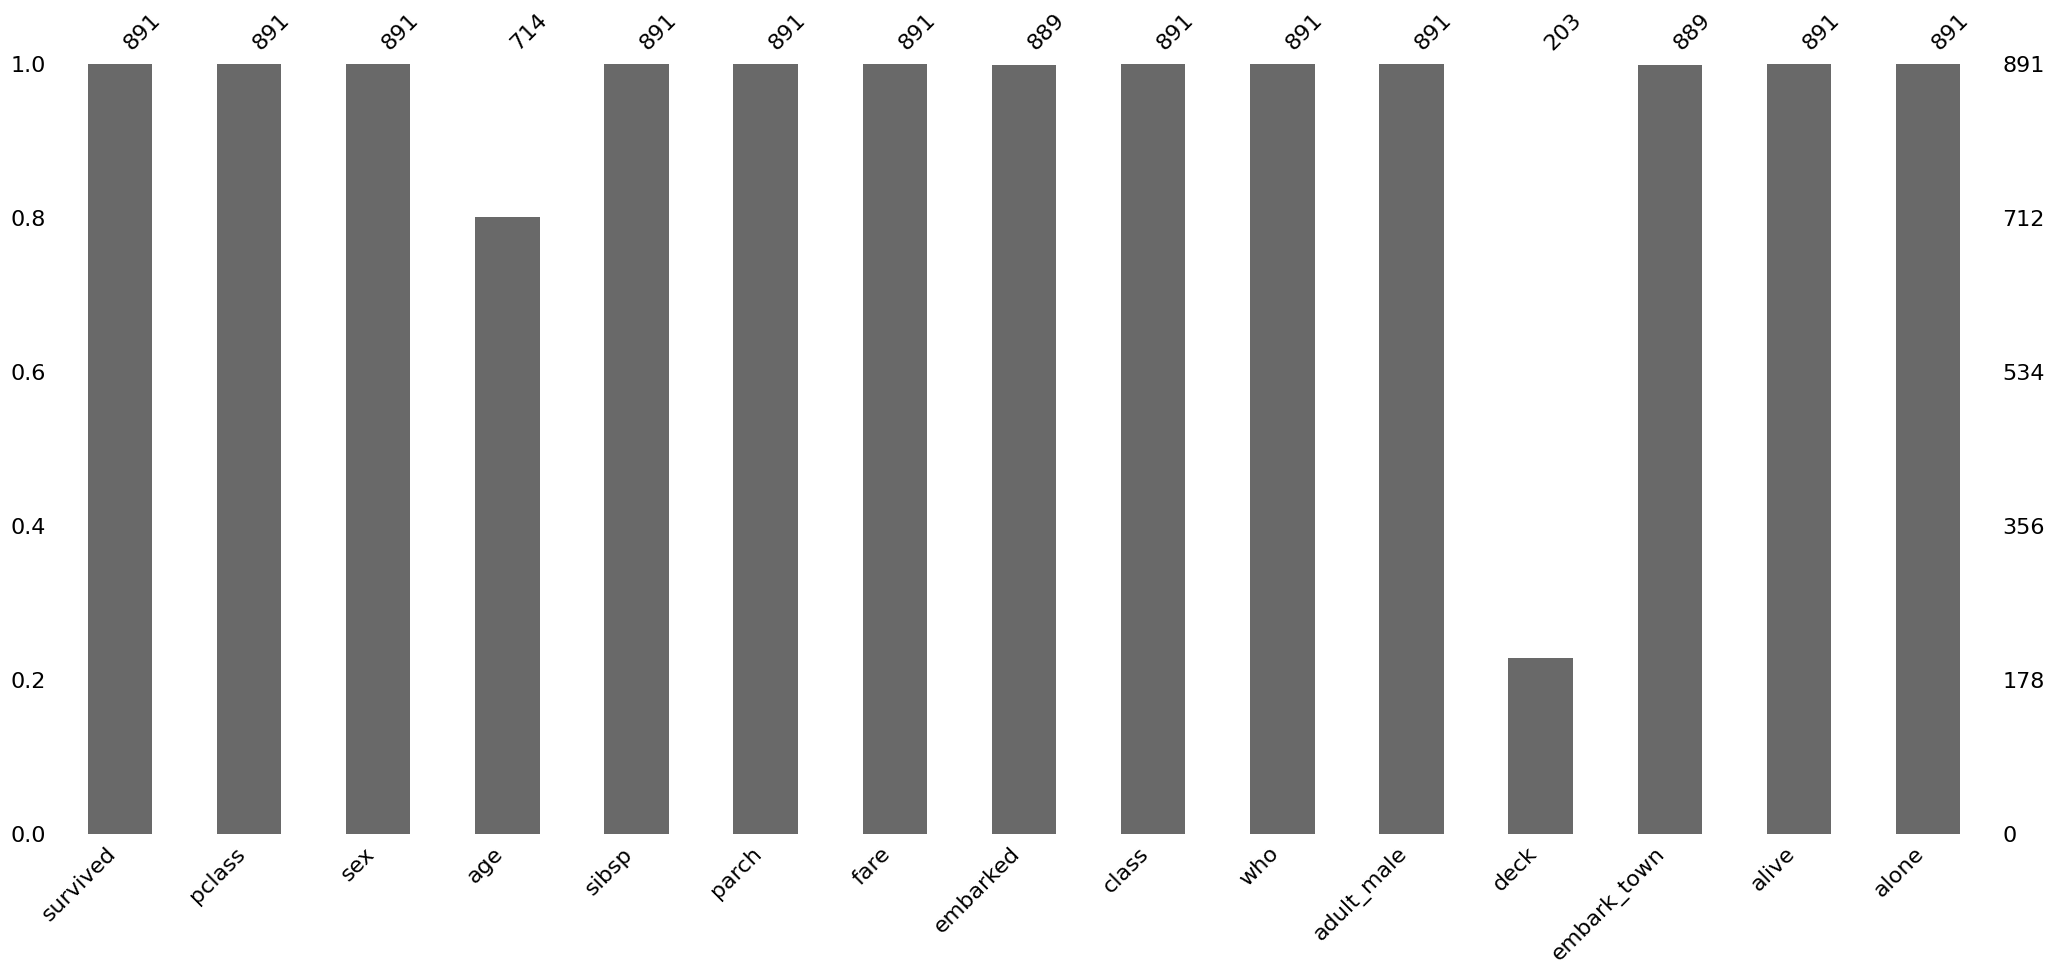

In [18]:
msno.bar(titanic)
plt.show()

In [19]:
# 결측치를 없에는 방법
# 단 titanic 데이터는 너무 많아서 잘 보이지 않음
titanic.dropna().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [20]:
titanic.dropna(axis=1).head() # dropna를 컬럼별로 해서

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [21]:
# thresh=250 => 250이상의 값을 지운다
titanic.dropna(thresh=250, axis=1).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [26]:
from sklearn.impute import SimpleImputer
# mean 평균, median 중앙값, most_frequent 최빈값
imputer = SimpleImputer(strategy='most_frequent')
titanic = pd.DataFrame(imputer.fit_transform(titanic), columns=titanic.columns)

ValueError: Cannot use most_frequent strategy with non-numeric data:
could not convert string to float: 'male'

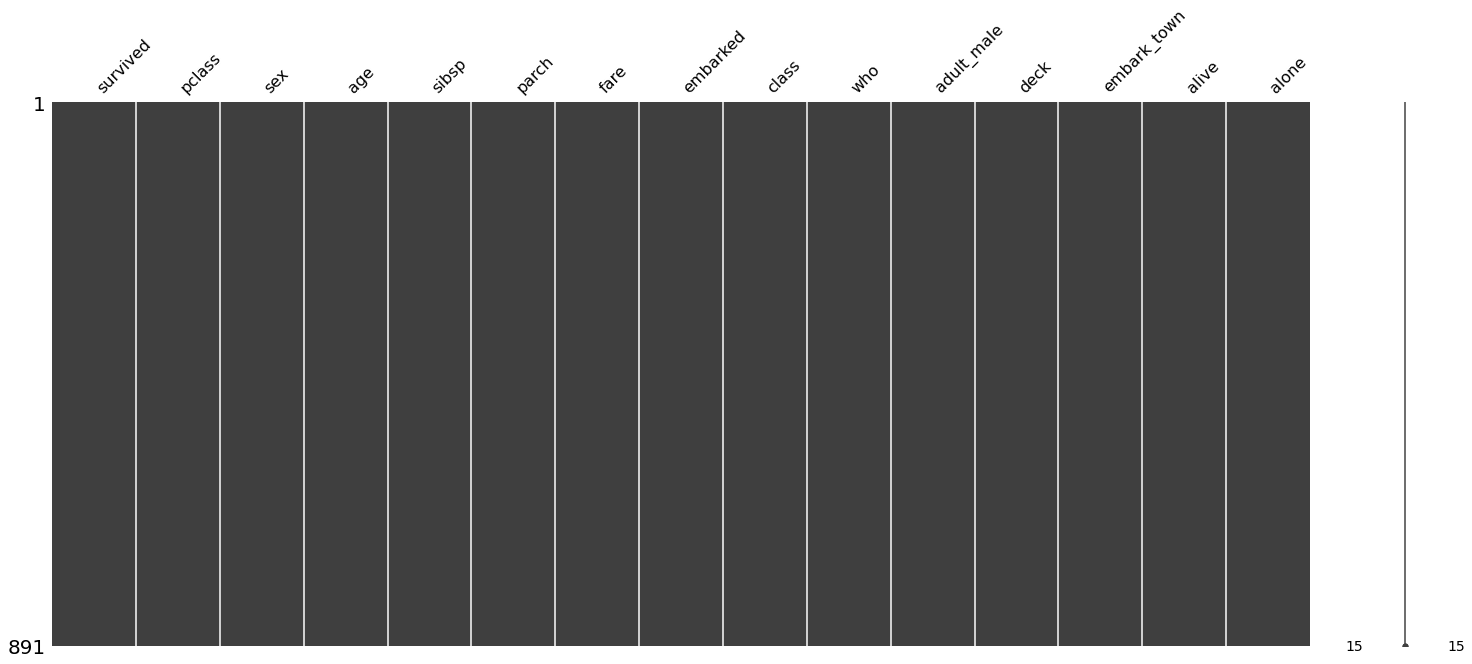

In [ ]:
msno.matrix(titanic)
plt.show()